In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading dataset
from google.colab import drive
drive.mount('/content/drive/')
data=pd.read_csv('Alphabets_data.csv')
data

Mounted at /content/drive/


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
# Display basic information about the dataset
print("Shape of the dataset:", data.shape)
print("Columns:", data.columns)
print("\nClass distribution:")
print(data['letter'].value_counts())

Shape of the dataset: (20000, 17)
Columns: Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

Class distribution:
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


In [ ]:
# Separate features and target variable
X = data.drop('letter', axis=1)
y = data['letter']

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Model Implementation
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
450/450 [==============================] - 6s 9ms/step - loss: 1.8777 - accuracy: 0.4876 - val_loss: 1.1099 - val_accuracy: 0.6819
Epoch 2/20
450/450 [==============================] - 3s 7ms/step - loss: 0.9074 - accuracy: 0.7374 - val_loss: 0.8004 - val_accuracy: 0.7619
Epoch 3/20
450/450 [==============================] - 3s 7ms/step - loss: 0.6976 - accuracy: 0.7969 - val_loss: 0.6591 - val_accuracy: 0.8112
Epoch 4/20
450/450 [==============================] - 2s 5ms/step - loss: 0.5874 - accuracy: 0.8274 - val_loss: 0.5815 - val_accuracy: 0.8350
Epoch 5/20
450/450 [==============================] - 1s 2ms/step - loss: 0.5149 - accuracy: 0.8508 - val_loss: 0.5137 - val_accuracy: 0.8487
Epoch 6/20
450/450 [==============================] - 1s 2ms/step - loss: 0.4632 - accuracy: 0.8633 - val_loss: 0.4691 - val_accuracy: 0.8619
Epoch 7/20
450/450 [==============================] - 1s 2ms/step - loss: 0.4206 - accuracy: 0.8789 - val_loss: 0.4274 - val_accuracy: 0.8737
Epoch 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define a pipeline including feature scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(max_iter=1000))
])

# Define the hyperparameters to tune
param_grid = {
    'classifier__hidden_layer_sizes': [(32,), (64,), (128,)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__learning_rate_init': [0.001, 0.01, 0.1]
}

# Create a custom scoring function using accuracy
custom_scorer = make_scorer(accuracy_score)

# Perform grid search
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring=custom_scorer)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_result.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'classifier__activation': 'tanh', 'classifier__hidden_layer_sizes': (128,), 'classifier__learning_rate_init': 0.001}


In [ ]:
#Evaluation
# Make predictions using the tuned model
y_pred = grid.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

           A       0.97      0.99      0.98       149
           B       0.93      0.97      0.95       153
           C       0.97      0.93      0.95       137
           D       0.95      0.93      0.94       156
           E       0.94      0.97      0.96       141
           F       0.94      0.97      0.96       140
           G       0.96      0.94      0.95       160
           H       0.89      0.90      0.89       144
           I       0.99      0.93      0.96       146
           J       0.95      0.98      0.97       149
           K       0.94      0.94      0.94       130
           L       0.96      0.98      0.97       155
           M       0.98      0.99      0.99       168
           N       0.99      0.95      0.97       151
           O       0.95      0.97      0.96       145
           P       0.97      0.98      0.97       173
           Q       0.96      0.95      0.95       166
           R       0.92    

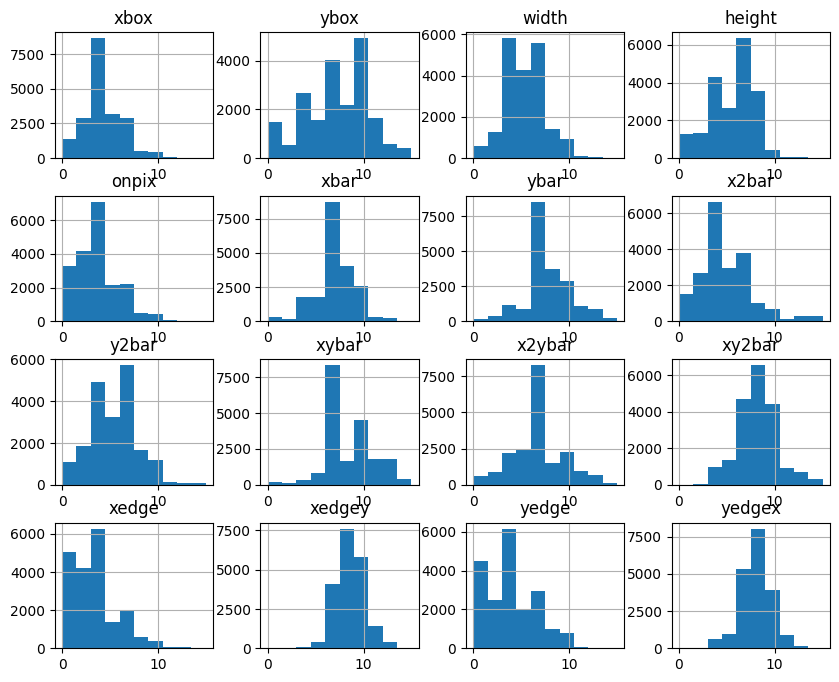

In [ ]:
# Univariate Analysis
# Plot histograms
data.hist(figsize=(10, 8))
plt.show()

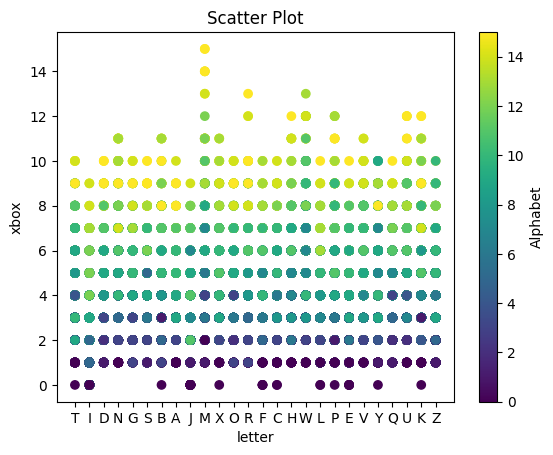

In [ ]:
# Bivariate Analysis
# Scatter plot
plt.scatter(data['letter'], data['xbox'], c=data['ybox'], cmap='viridis')
plt.xlabel('letter')
plt.ylabel('xbox')
plt.title('Scatter Plot')
plt.colorbar(label='Alphabet')
plt.show()


In [ ]:
#Multivariate Analysis
# Pair plot
sns.pairplot(data, hue='letter', diag_kind='hist')
plt.show()


In [ ]:
from sympy.vector import*
from sympy import symbols
x,y,z=symbols('x y z')
N=CoordSys3D('N')
A=N.x**2*N.y*N.z*N.i+N.y**2*N.z*N.x*N.j+N.z**2*N.x*N.y*N.k
delop=Del()
divA=delop.dot(A)
display(divA)
print(f"\n the divergence of {A} is \n" )
display(divergence(A))


Derivative(N.x*N.y*N.z**2, N.z) + Derivative(N.x*N.y**2*N.z, N.y) + Derivative(N.x**2*N.y*N.z, N.x)


 the divergence of N.x**2*N.y*N.z*N.i + N.x*N.y**2*N.z*N.j + N.x*N.y*N.z**2*N.k is 



6*N.x*N.y*N.z